C:\Users\LIKE\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log2
  after removing the cwd from sys.path.
C:\Users\LIKE\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


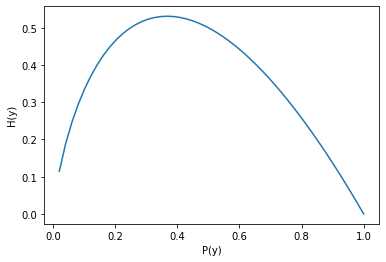

In [11]:
import numpy as np
from matplotlib import pyplot as plt
x=np.linspace(start=0,stop=1)
y=-x*np.log2(x)
plt.plot(x,y)
plt.xlabel('P(y)')
plt.ylabel('H(y)')
plt.show()

C:\Users\LIKE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  
C:\Users\LIKE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


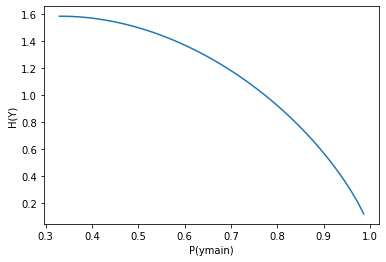

In [12]:
main=np.linspace(start=0.33,stop=1)
Hy=-main*np.log2(main)+-2*(1-main)/2*np.log2((1-main)/2)
plt.plot(main,Hy)
plt.xlabel('P(ymain)')
plt.ylabel('H(Y)')
plt.show()
